In [1]:
from gensim.models import word2vec

import os, sys

from utils.pickle_helper import pickle_load, pickle_dump
from utils.tokenizers import tokenizer

DATASET_DIR = './novels'
MODEL_PATH = './pickle_objects/aozora_w2v.pickle'
MODEL_PATH2 = './pickle_objects/aozora_w2v.model'

model = pickle_load(MODEL_PATH)
model.save(MODEL_PATH2)
print('load')

Using TensorFlow backend.


load


In [12]:
from sklearn.cluster import KMeans
from gensim.models import word2vec
import numpy as np

import os, sys

from utils.pickle_helper import pickle_load, pickle_dump
from utils.tokenizers import tokenizer

DATASET_DIR = './novels'
MODEL_PATH = './pickle_objects/aozora_w2v.pickle'
MODEL_PATH2 = './pickle_objects/aozora_w2v.model'


w2vmodel = word2vec.Word2Vec.load(MODEL_PATH2)
vocab = w2vmodel.wv.vocab.keys()
words_array = []
for word in vocab:
    words_array.append(w2vmodel[word])
print('clustering')
words_array_np = np.array(words_array)
kmeans_res = KMeans(n_clusters=300, max_iter=300).fit(words_array_np)
print(kmeans_res)

clustering
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=300, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


In [ ]:
tfidf_vec = pickle_load('pickle_objects/tf_idf_vec_sw.pickle')

In [18]:
pickle_dump(kmeans_res, 'aozora_tfidf_word_kmeans.pickle')

writing total_bytes=599089...
writing bytes [0, 599089)... done.


(array([ 851., 1822.,  227.,  501.,  322.,  315.,  344.,  301.,  266.,
         146.,  142.,  186.,  175.,  274.,  265.,  216.,  172.,  170.,
         353.,  303.,   92.,  291.,  209.,  221., 1281.,  221.,  207.,
         253.,  160.,  394.,  923.,  342.,  196.,  147.,  280.,  159.,
         281.,  260.,  272.,  286.,  768.,  385.,  116.,  763.,  215.,
         211.,  159.,  189.,  328.,  289.,  244.,  267.,  337., 1462.,
         235., 1118.,  265.,  383.,  276.,  220.,  110.,  281., 1365.,
         185.,  536.,  228.,  157.,  221.,  515.,  191.,  268.,  109.,
         162.,  306.,  392.,  470., 1178.,  390.,  140.,  251.,  197.,
          97.,  391.,  775.,  166.,  234., 3864.,  322.,  228.,  392.,
         215.,  194.,  211.,  111.,  344.,  154.,  554.,  360.,  349.,
         200.,  285.,  224.,  839., 2770., 1650.,  239.,  197.,  209.,
         208.,  271.,  186.,  937.,  239.,  109.,  258.,  142.,  156.,
         143.,  266., 1685.,  768.,  222.,  709.,  183.,  193.,  136.,
      

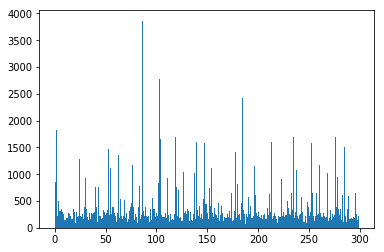

In [16]:
import matplotlib.pyplot as plt
plt.hist(kmeans_res.labels_, bins=300)

In [43]:
w2vmodel = word2vec.Word2Vec.load(MODEL_PATH2)
print(w2vmodel.wv.most_similar(positive=['激怒'], topn=10))

[('憤怒', 0.7130043506622314), ('激昂', 0.687428891658783), ('憤激', 0.6846510171890259), ('怒り', 0.6807619333267212), ('憤る', 0.6691967844963074), ('驚愕', 0.6427136659622192), ('逆上', 0.6369041800498962), ('叱咤', 0.607385516166687), ('叱責', 0.6066831946372986), ('狼狽', 0.6062193512916565)]


In [38]:
from gensim.models import KeyedVectors
#wiki_model = KeyedVectors.load_word2vec_format('./pickle_objects/entity_vector.model.bin', binary=True)
print(wiki_model.wv.most_similar(positive=['メロス'], topn=10))

[('[メリアドク・ブランディバック]', 0.6494805812835693), ('ニルス', 0.6397469639778137), ('クローディオ', 0.6338703632354736), ('[ベルガリオン]', 0.624444842338562), ('[エオウィン]', 0.6243359446525574), ('ローハン', 0.62108314037323), ('アベル', 0.6190121173858643), ('アンジェリカ', 0.6186339259147644), ('エリサ', 0.6166181564331055), ('エルザ', 0.6157675385475159)]


In [53]:
merosu = w2vmodel.wv['メロス']
hashiru = w2vmodel.wv['走る']
sub = merosu - hashiru
print(w2vmodel.most_similar([sub]))

[('黄道吉日', 0.4538549482822418), ('メロス', 0.4192773997783661), ('真心', 0.41565418243408203), ('こそ', 0.41269564628601074), ('総統', 0.4102414846420288), ('政恒', 0.4036811888217926), ('潔い', 0.403376042842865), ('心から', 0.4014996588230133), ('生殺与奪の権', 0.40138477087020874), ('得度式', 0.3940085172653198)]
